<a href="https://colab.research.google.com/github/Tounsix/NLP_Assignment_3/blob/main/Sentiment_analysis_Lexicon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Sentiment analysis :Lexicon based methods

In [1]:
import pandas as pd
import re
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download once
nltk.download("vader_lexicon")

# Load the dataset
df = pd.read_csv("tweets-data.csv")

# Clean text
def clean_text(text):
    text = re.sub(r"http\S+|@\S+|#\S+", "", text)
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    return text.lower().strip()

df["cleaned_tweet"] = df["Tweets"].astype(str).apply(clean_text)

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Apply VADER
def analyze_sentiment(text):
    score = sia.polarity_scores(text)["compound"]
    label = "positive" if score > 0.05 else "negative" if score < -0.05 else "neutral"
    return pd.Series([score, label])

df[["sentiment_score", "sentiment_label"]] = df["cleaned_tweet"].apply(analyze_sentiment)

# Save or view results
df[["Tweets", "sentiment_score", "sentiment_label"]].to_csv("tweets_sentiment_output.csv", index=False)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [2]:
df.head()

,Unnamed: 0,Date Created,Number of Likes,Source of Tweet,Tweets,hashtag,cleaned_tweet,sentiment_score,sentiment_label
0,0,2023-06-25 19:16:20+00:00,0,NaN,@jacksonhinklle #wagner with 6.2 billion dolla...,wagner,with billion dollar,0.000,neutral
1,1,2023-06-25 19:16:18+00:00,0,NaN,Pobrecito es discapacitado\n#Reddetuiterosdemo...,wagner,pobrecito es discapacitado,0.000,neutral
2,2,2023-06-25 19:16:07+00:00,0,NaN,News from the EIR Daily Alert\n\n“#Putin Addre...,wagner,news from the eir daily alert\n\n addressed th...,0.296,positive
3,3,2023-06-25 19:15:56+00:00,0,NaN,It's Messi day #Messi𓃵 #Messi36 #Russia #bigst...,wagner,its messi day,0.000,neutral
4,4,2023-06-25 19:15:54+00:00,0,NaN,Il passaggio chiave di Machiavelli era questo ...,wagner,il passaggio chiave di machiavelli era questo ...,0.000,neutral


/tmp/ipython-input-3-3151295450.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment_label", data=df, palette="Set2")


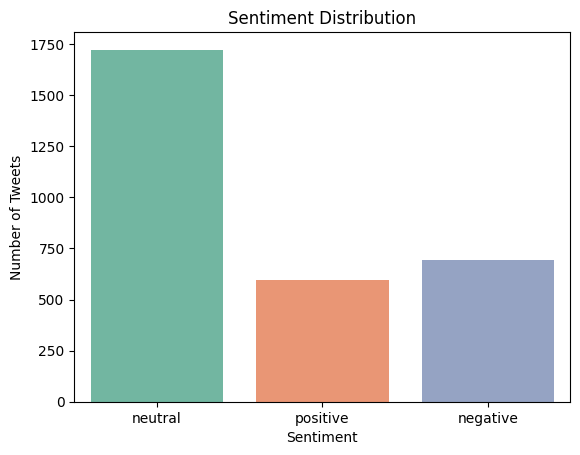

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="sentiment_label", data=df, palette="Set2")
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

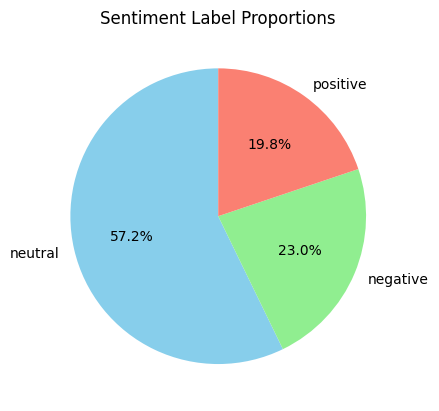

In [4]:
df['sentiment_label'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=["skyblue", "lightgreen", "salmon"])
plt.title("Sentiment Label Proportions")
plt.ylabel("")
plt.show()

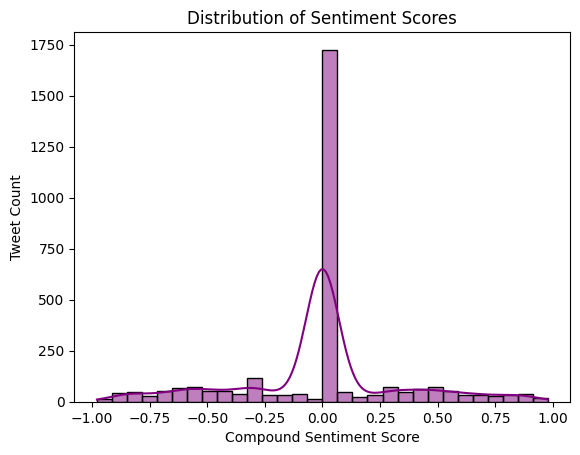

In [5]:
sns.histplot(df["sentiment_score"], kde=True, bins=30, color="purple")
plt.title("Distribution of Sentiment Scores")
plt.xlabel("Compound Sentiment Score")
plt.ylabel("Tweet Count")
plt.show()